In [6]:
import ftplib
import gzip
from pathlib import Path

FTP_HOST = 'ftp.ensembl.org'
RELEASE = '113'   # adjust to latest
SPECIES = 'homo_sapiens'
BASE_DIR = f'/pub/release-{RELEASE}/fasta/{SPECIES}'

def download_file(subdir, filename, out_dir='data'):
    ftp = ftplib.FTP(FTP_HOST)
    ftp.login()
    ftp.cwd(f'{BASE_DIR}/{subdir}')
    Path(out_dir).mkdir(exist_ok=True)
    out_path = Path(out_dir) / filename
    with open(out_path, 'wb') as f:
        ftp.retrbinary(f'RETR {filename}', f.write)
    ftp.quit()
    return out_path

# Download human CDS and protein FASTA
cds_gz = download_file('cds', f'{SPECIES.capitalize()}.GRCh38.cds.all.fa.gz')
pep_gz = download_file('pep', f'{SPECIES.capitalize()}.GRCh38.pep.all.fa.gz')

# Example: stream‑parse first 5 entries
import gzip
from Bio import SeqIO

for fmt, gz in [('CDS', cds_gz), ('Protein', pep_gz)]:
    with gzip.open(gz, 'rt') as f:
        for i, rec in enumerate(SeqIO.parse(f, 'fasta')):
            # if i >= 1000000: break # works fine
            if i >= 5: break
            print(f'>{fmt} {rec.id} length={len(rec)}')
            print(rec.seq)


In [2]:
17*3

51

# Loading Drug-Target Interaction Datasets

This notebook covers:
- Loading the Davis, KIBA, BindingDB, Metz datasets
- Merging them into a single dataframe
- Filtering based on molecular properties
- Annotating drugs and targets with additional information (InChI keys, DNA sequences, etc.)
- Visualizing distributions, overlaps, and statistics
- Saving the merged dataset as a csv file

Unique drug-target interaction pairs: 396.469
- Unique drugs: 149,962
- Unique targets: 2.047
- Ratio observed: 0.13%

## Load, merge and filter the DTI datasets

In [1]:
from resolve import *
from mb_vae_dti.loading import *

df = load_or_create_merged_dataset(
    dataset_names=["DAVIS", "KIBA", "BindingDB_Kd", "BindingDB_Ki", "Metz"], 
    force_reload=True,
    apply_filters=True,
    filter_before_merge=True,
    verbose=True
)
df

Setting working directory to: /home/robsyc/Desktop/thesis/MB-VAE-DTI


Found local copy...
Loading...
Done!
To log space...
The original data has been updated!


🔄 Creating merged dataset from: DAVIS, KIBA, BindingDB_Kd, BindingDB_Ki, Metz
ℹ️ KIBA dataset will be prioritized during merging
ℹ️ Datasets will be filtered before merging
ℹ️ KIBA dataset detected. Reordering to prioritize KIBA values in conflicts.

🔄 Merging datasets: DAVIS, BindingDB_Kd, BindingDB_Ki, Metz, KIBA

📂 Loading DAVIS dataset...
  - Loaded 25,772 interactions
  - Unique drugs: 68
  - Unique targets: 379

🔍 Applying filters to DAVIS dataset...
  - Initial rows: 25,772
  - Unique drugs: 68
  - Unique targets: 379
  - Filtered out 2,584 rows (10.03%) due to protein sequence length
  - Lost 38 unique targets
⏳ Filtering 68 new molecules...
✅ Filtering results for new molecules: 61 passed, 7 failed
📊 Failure breakdown:
  - multi_component: 4 molecules
  - atom_type: 3 molecules


Found local copy...
Loading...
Done!
To log space...



✅ Filtering complete:
  - Rows reduced from 25,772 to 20,801 (19.29% reduction)
  - Unique drugs reduced from 68 to 61 (10.29% reduction)
  - Unique targets reduced from 379 to 341

📂 Loading BindingDB_Kd dataset...


The original data has been updated!


  - Found duplicate drug-target pairs in BindingDB_Kd
  - Loaded 42,229 interactions
  - Unique drugs: 9,887
  - Unique targets: 1,088

🔍 Applying filters to BindingDB_Kd dataset...
  - Initial rows: 42,229
  - Unique drugs: 9,887
  - Unique targets: 1,088
  - Filtered out 3,789 rows (8.97%) due to protein sequence length
  - Lost 82 unique targets
ℹ️ Using cached results for 41 molecules
⏳ Filtering 9,555 new molecules...


Found local copy...
Loading...


✅ Filtering results for new molecules: 7,502 passed, 2,053 failed
📊 Failure breakdown:
  - multi_component: 60 molecules
  - mol_weight: 499 molecules
  - atom_charge: 631 molecules
  - atom_type: 353 molecules
  - heavy_atoms: 510 molecules
ℹ️ Found 492 molecules that canonicalize to the same SMILES as other molecules
  - Unique canonical SMILES that passed filters: 7,120
  - Resolving duplicate drug-target pairs after canonicalization

✅ Filtering complete:
  - Rows reduced from 42,229 to 34,193 (19.03% reduction)
  - Unique drugs reduced from 9,887 to 7,158 (27.60% reduction)
  - Unique targets reduced from 1,088 to 890
  - Canonicalization effect: 382 drugs consolidated

📂 Loading BindingDB_Ki dataset...


Done!
To log space...
The original data has been updated!


  - Found duplicate drug-target pairs in BindingDB_Ki
  - Loaded 296,667 interactions
  - Unique drugs: 160,079
  - Unique targets: 2,420

🔍 Applying filters to BindingDB_Ki dataset...
  - Initial rows: 296,667
  - Unique drugs: 160,079
  - Unique targets: 2,420
  - Filtered out 5,442 rows (1.83%) due to protein sequence length
  - Lost 124 unique targets
ℹ️ Using cached results for 1,340 molecules
⏳ Filtering 155,206 new molecules...
✅ Filtering results for new molecules: 136,640 passed, 18,566 failed
📊 Failure breakdown:
  - multi_component: 917 molecules
  - mol_weight: 1,283 molecules
  - atom_charge: 6,925 molecules
  - atom_type: 6,543 molecules
  - heavy_atoms: 2,898 molecules
ℹ️ Found 10,227 molecules that canonicalize to the same SMILES as other molecules
  - Unique canonical SMILES that passed filters: 127,508
  - Resolving duplicate drug-target pairs after canonicalization

✅ Filtering complete:
  - Rows reduced from 296,667 to 240,091 (19.07% reduction)
  - Unique drugs red

Found local copy...
Loading...


✅ Filtering results for new molecules: 1,311 passed, 105 failed
📊 Failure breakdown:
  - atom_charge: 23 molecules
  - atom_type: 82 molecules
ℹ️ Found 14 molecules that canonicalize to the same SMILES as other molecules
  - Unique canonical SMILES that passed filters: 1,297
  - Resolving duplicate drug-target pairs after canonicalization

✅ Filtering complete:
  - Rows reduced from 35,259 to 28,122 (20.24% reduction)
  - Unique drugs reduced from 1,423 to 1,302 (8.50% reduction)
  - Unique targets reduced from 170 to 153
  - Canonicalization effect: 14 drugs consolidated

📂 Loading KIBA dataset...


Done!


  - Loaded 117,657 interactions
  - Unique drugs: 2,068
  - Unique targets: 229

🔍 Applying filters to KIBA dataset...
  - Initial rows: 117,657
  - Unique drugs: 2,068
  - Unique targets: 229
  - Filtered out 11,917 rows (10.13%) due to protein sequence length
  - Lost 19 unique targets
ℹ️ Using cached results for 174 molecules
⏳ Filtering 1,894 new molecules...
✅ Filtering results for new molecules: 1,723 passed, 171 failed
📊 Failure breakdown:
  - multi_component: 21 molecules
  - mol_weight: 2 molecules
  - atom_charge: 32 molecules
  - atom_type: 87 molecules
  - heavy_atoms: 29 molecules

✅ Filtering complete:
  - Rows reduced from 117,657 to 97,509 (17.12% reduction)
  - Unique drugs reduced from 2,068 to 1,882 (8.99% reduction)
  - Unique targets reduced from 229 to 210

🔄 Merging 5 datasets...
  - Merging BindingDB_Kd (34,193 pairs)...
  - Found 111 conflicting Y values (0.72% of overlapping pairs; 0.72% of total merges)
  - Merging BindingDB_Ki (240,091 pairs)...
  - Found 20

,Drug_SMILES,Target_AA,Y,Y_pKd,Y_pKi,Y_KIBA,in_DAVIS,in_BindingDB_Kd,in_BindingDB_Ki,in_Metz,in_KIBA
0,C#CC(=O)C1(C)CCC2c3ccc(O)cc3CCC2C1,MARTVVLITGCSSGIGLHLAVRLASDPSQSFKVYATLRDLKTQGRL...,False,NaN,5.552826,NaN,False,False,True,False,False
1,C#CC(C#C)=C1CCC(N(CCC)CCC)CC1,MASLSQLSSHLNYTCGAENSTGASQARPHAYYALSYCALILAIVFG...,False,NaN,5.356537,NaN,False,False,True,False,False
2,C#CC(C#C)=C1CCC(N(CCC)CCC)CC1,MDPLNLSWYDDDLERQNWSRPFNGSDGKADRPHYNYYATLLTLLIA...,False,NaN,4.809891,NaN,False,False,True,False,False
3,C#CC(C#C)=C1CCC(N(CCC)CCC)CC1,MRTLNTSTMEGTGLVAERDFSFRILTACFLSLLILSTLLGNTLVCA...,False,NaN,4.795877,NaN,False,False,True,False,False
4,C#CC(C)(C)C,MAVLGITIALLVWVATLLVISIWKQIYNSWNLPPGPFPLPILGNIF...,False,NaN,3.000000,NaN,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
382342,c1ncc(Cc2cc3c(s2)CCCC3)[nH]1,MTFRDLLSVSFEGPRPDSSAGGSSAGGGGGSAGGAAPSEGPAVGGV...,True,NaN,8.420216,NaN,False,False,True,False,False
382343,c1ncc(Cc2ccsc2)[nH]1,MTFRDLLSVSFEGPRPDSSAGGSSAGGGGGSAGGAAPSEGPAVGGV...,True,NaN,8.494850,NaN,False,False,True,False,False
382344,c1ncc(N2CC3CNCC3C2)cc1N1CCOCC1,MANSGTGAPPPLLLLPLLLLLGTGLLPASSHIETRAHAEERLLKRL...,False,NaN,7.326979,NaN,False,False,True,False,False
382345,c1ncc(N2CC3CNCC3C2)cc1N1CCOCC1,MCGGRGGIWLALAAALLHVSLQGEFQRRLYKELVKNYNPLERPVAN...,False,NaN,4.999996,NaN,False,False,True,False,False


## Annotate drugs and targets with additional information

We annotate the drugs (SMILES) and targets (AA sequences) with additional information.
For drugs:
- Canonical SMILES from RDKit.
- InChI key from PubChem/ChEMBL.

For targets:
- Identifiers: UniProt ID, RefSeq ID, Gene name.
- Sequences: Amino acid sequence from Uniprot, DNA sequence from RefSeq.

In [ ]:
from mb_vae_dti.loading import annotate_dti

# this runs & caches API calls to PubChem, ChEMBL, Uniprot, BLAST, etc.
# it takes 2-3 days to run on the full dataset (20 mins when cached)
df = annotate_dti(df, verbose=True)

Starting annotation process...
Input dataset contains 382347 drug-target interactions

Step 1: Extracting unique drugs and targets...
Found 136574 unique drugs and 2601 unique targets

Step 2: Adding potential IDs...
Adding potential IDs from all datasets...
Generated cache key: aa77fe7c8da68edb193325c5f0bd7d1b for 136574 drugs and 2601 targets


Fetching IDs from datasets:   0%|          | 0/5 [00:00<?, ?it/s]Found local copy...
Loading...
Done!
Fetching IDs from datasets:  20%|██        | 1/5 [00:00<00:00,  7.31it/s]Found local copy...
Loading...


Fetching IDs from DAVIS...
Loading DAVIS dataset...
Canonicalizing 68 SMILES strings...
Canonicalized 68 SMILES strings
Gathered 68 unique drugs and 379 unique targets from DAVIS
Fetching IDs from BindingDB_Kd...
Loading BindingDB_Kd dataset...


Done!


Canonicalizing 10661 SMILES strings...


Fetching IDs from datasets:  40%|████      | 2/5 [00:02<00:04,  1.52s/it]Found local copy...
Loading...


Canonicalized 10661 SMILES strings
Gathered 10148 unique drugs and 1088 unique targets from BindingDB_Kd
Fetching IDs from BindingDB_Ki...
Loading BindingDB_Ki dataset...


Done!


Canonicalizing 172499 SMILES strings...


Fetching IDs from datasets:  60%|██████    | 3/5 [00:37<00:33, 16.79s/it]Found local copy...
Loading...


Canonicalized 172499 SMILES strings
Gathered 161167 unique drugs and 2420 unique targets from BindingDB_Ki
Fetching IDs from KIBA...
Loading KIBA dataset...


Done!


Canonicalizing 2068 SMILES strings...


Fetching IDs from datasets:  80%|████████  | 4/5 [00:38<00:10, 10.61s/it]

Canonicalized 2068 SMILES strings
Gathered 2068 unique drugs and 229 unique targets from KIBA
Fetching IDs from Metz...
Loading Metz dataset...
Canonicalizing 1423 SMILES strings...


Fetching IDs from datasets: 100%|██████████| 5/5 [00:39<00:00,  7.83s/it]

Canonicalized 1423 SMILES strings
Gathered 1409 unique drugs and 170 unique targets from Metz


Successfully saved potential IDs cache to data/processed/annotations/potential_ids_cache.json
Added 137872 potential drug IDs to 136574/136574 drugs
Added 2960 potential target IDs to 2601/2601 targets

Step 3: Annotating drugs...
Annotating drugs with potential IDs...
Processing 136574 drugs...
Found 136574 drugs with potential IDs
Processed 100/136574 drugs (100 valid so far)
  No matching molecule found from IDs, using SMILES directly: 
  - SMILES: C#CCCCOc1ccc2ccc(=O)oc2c1 
  - Potential IDs: {'44297464'}
  No matching molecule found from IDs, using SMILES directly: 
  - SMILES: C#CCCCOc1ccc2ccc(=S)oc2c1 
  - Potential IDs: {'11367242'}
  No matching molecule found from IDs, using SMILES directly: 
  - SMILES: C#CCN(Cc1cc2c(=O)[nH]c(C)nc2cc1C)c1ccc(C(=O)NC(CCC(=O)NC(CCC(=O)O)C(=O)O)C(=O)O)c(F)c1 
  - Potential IDs: {'132742'}
  No matching molecule found from IDs, using SMILES directly: 
  - SMILES: C#CCN(Cc1cc2c(=O)[nH]c(C)nc2cc1C)c1ccc(C(=O)NC(CCC(=O)NC(CCC(=O)O)C(=O)O)C(=O)O)cc1

In [ ]:
# print unique drugs and targets, interactions, number of possible interactions and ratio
print(f"Unique drugs: {len(df['Drug_SMILES'].unique())}")
print(f"Unique targets: {len(df['Target_AA'].unique())}")
print(f"Interactions: {len(df)}")
print(f"Number of possible interactions: {len(df['Drug_SMILES'].unique()) * len(df['Target_AA'].unique())}")
print(f"Ratio: {(len(df) / (len(df['Drug_SMILES'].unique()) * len(df['Target_AA'].unique()))) * 100}%")
df

In [4]:
# print unique drugs and targets, interactions, number of possible interactions and ratio
print(f"Unique drugs: {len(df['Drug_SMILES'].unique())}")
print(f"Unique targets: {len(df['Target_AA'].unique())}")
print(f"Interactions: {len(df)}")
print(f"Number of possible interactions: {len(df['Drug_SMILES'].unique()) * len(df['Target_AA'].unique())}")
print(f"Ratio: {(len(df) / (len(df['Drug_SMILES'].unique()) * len(df['Target_AA'].unique()))) * 100}%")
df

Unique drugs: 149962
Unique targets: 2047
Interactions: 396469
Number of possible interactions: 306972214
Ratio: 0.12915468629352883%


,Drug_ID,Drug_InChIKey,Drug_SMILES,Target_ID,Target_UniProt_ID,Target_Gene_name,Target_RefSeq_ID,Target_AA,Target_DNA,Y,Y_pKd,Y_pKi,Y_KIBA,in_DAVIS,in_BindingDB_Kd,in_BindingDB_Ki,in_Metz,in_KIBA
0,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000001,Q2M2I8,AAK1,NM_014911,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,ATGAAGAAGTTTTTCGACTCCCGGCGAGAGCAGGGCGGCTCTGGCC...,False,4.999996,NaN,NaN,True,True,False,False,False
1,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000002,P00519,ABL1,NM_005157,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,AACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACA...,True,8.920819,NaN,NaN,True,False,False,False,False
3,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000003,Q04771,ACVR1,NM_001105,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,ATGGTAGATGGAGTGATGATTCTTCCTGTGCTTATCATGATTGCTC...,False,4.999996,NaN,NaN,True,True,False,False,False
4,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000004,P36896,ACVR1B,NM_004302,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,ATGGCGGAGTCGGCCGGAGCCTCCTCCTTCTTCCCCCTTGTTGTCC...,False,4.999996,NaN,NaN,True,True,False,False,False
5,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000005,P27037,ACVR2A,NM_001278579,MGAAAKLAFAVFLISCSSGAILGRSETQECLFFNANWEKDRTNQTG...,ATGGGAGCTGCTGCAAAGTTGGCGTTTGCCGTCTTTCTTATCTCCT...,False,4.999996,NaN,NaN,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481971,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T001711,P41279,MAP3K8,NM_001244134,MEYMSTGSDNKEEIDLLIKHLNVSDVIDIMENLYASEEPAVYEPSL...,ATGGAGTACATGAGCACTGGAAGTGACAATAAAGAAGAGATTGATT...,True,NaN,NaN,13.70206,False,False,False,False,True
481973,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000031,Q13554,CAMK2B,NM_001220,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,ATGGCCACCACGGTGACCTGCACCCGCTTCACCGACGAGTACCAGC...,False,NaN,NaN,10.49794,False,False,False,False,True
481975,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000032,Q13557,CAMK2D,NM_001221,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,ATGGCTTCGACCACAACCTGCACCAGGTTCACGGACGAGTATCAGC...,False,NaN,NaN,10.49794,False,False,False,False,True
481976,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000280,Q16539,MAPK14,NM_001315,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,ATGTCTCAGGAGAGGCCCACGTTCTACCGGCAGGAGCTGAACAAGA...,False,NaN,NaN,10.49794,False,False,False,False,True


In [ ]:
from mb_vae_dti.loading import get_dataset_stats

get_dataset_stats(df)

In [5]:
from mb_vae_dti.loading import get_dataset_stats

get_dataset_stats(df)

{'n_interactions': 396469,
 'n_unique_drugs': 149962,
 'n_unique_targets': 2047,
 'avg_drug_smiles_length': 52.68680527355228,
 'avg_target_aa_length': 542.1792145161412,
 'Y_pKd_mean': 5.715478379916169,
 'Y_pKd_std': 1.21219096902048,
 'Y_pKd_min': 1.999999995657055,
 'Y_pKd_max': 10.0,
 'Y_pKi_mean': 6.739502749769591,
 'Y_pKi_std': 1.461059400745257,
 'Y_pKi_min': 1.999999995657055,
 'Y_pKi_max': 10.1,
 'Y_KIBA_mean': 11.728814557922115,
 'Y_KIBA_std': 0.826001505543396,
 'Y_KIBA_min': 0.0,
 'Y_KIBA_max': 17.196910013,
 'in_DAVIS_count': 19244,
 'in_DAVIS_percentage': 4.853847337370639,
 'in_BindingDB_Kd_count': 30727,
 'in_BindingDB_Kd_percentage': 7.750164577810622,
 'in_BindingDB_Ki_count': 258121,
 'in_BindingDB_Ki_percentage': 65.10496407033085,
 'in_Metz_count': 26029,
 'in_Metz_percentage': 6.565204341323029,
 'in_KIBA_count': 89708,
 'in_KIBA_percentage': 22.626737525506407}

## Visualize the merged dataset

We visualize:
- The distribution of interactions across the datasets, showing the various ranges & binary thresholds.
- The statistics key drug and target properties.
- The overlap between source datasets.
- And Lorenz curves illustrating the biased nature of experimental drug-target interaction datasets.

In [6]:
from mb_vae_dti.loading import (
    plot_interaction_distribution,
    plot_dataset_statistics,
    plot_interaction_stats,
    plot_dataset_overlap,
    plot_lorenz_curves,
)

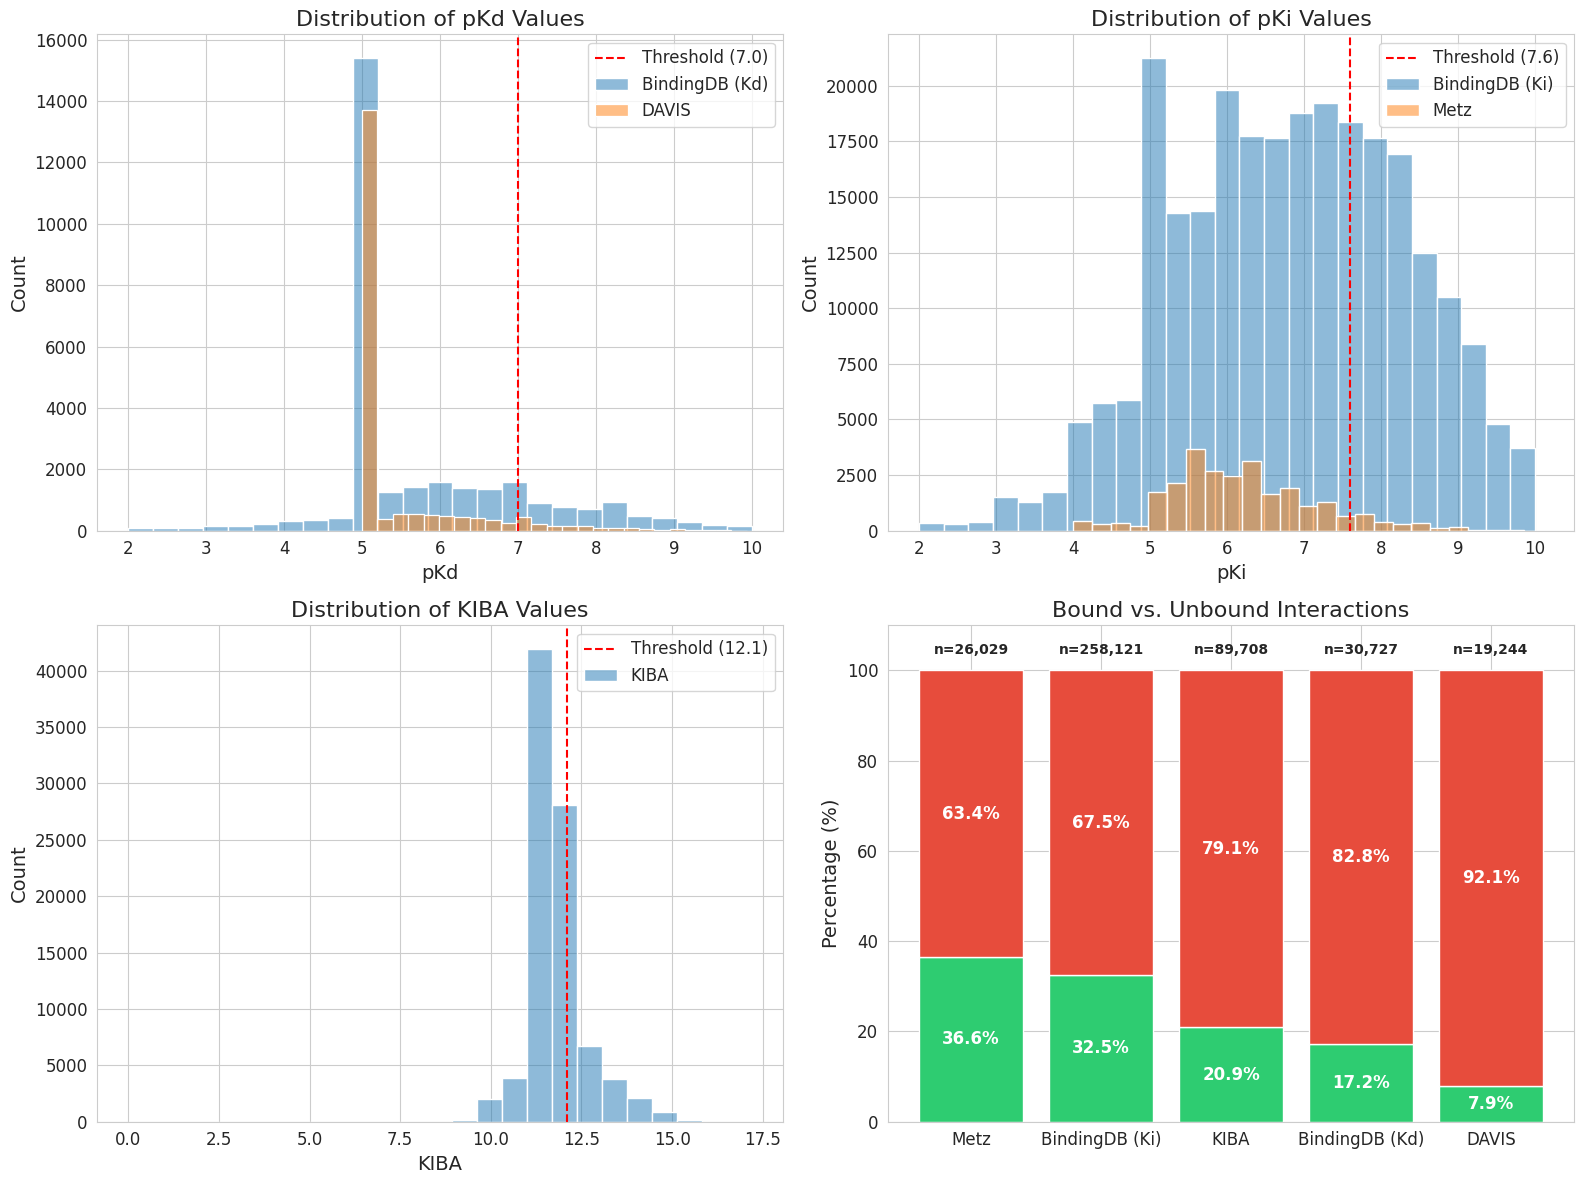

'data/images/interaction_distribution.png'

In [7]:
df_Davis = df[df['in_DAVIS'] == True].drop(columns = ['Y_pKi', 'Y_KIBA'])
df_BDBKd = df[df['in_BindingDB_Kd'] == True].drop(columns = ['Y_pKi', 'Y_KIBA'])
df_BDBKi = df[df['in_BindingDB_Ki'] == True].drop(columns = ['Y_pKd', 'Y_KIBA'])
df_Metz = df[df['in_Metz'] == True].drop(columns = ['Y_pKd', 'Y_KIBA'])
df_KIBA = df[df['in_KIBA'] == True].drop(columns = ['Y_pKd', 'Y_pKi'])

plot_interaction_distribution(
    [df_BDBKd, df_Davis, df_BDBKi, df_Metz, df_KIBA],
    ["BindingDB (Kd)", "DAVIS", "BindingDB (Ki)", "Metz", "KIBA"],
    save_path="data/images/interaction_distribution.png"
)

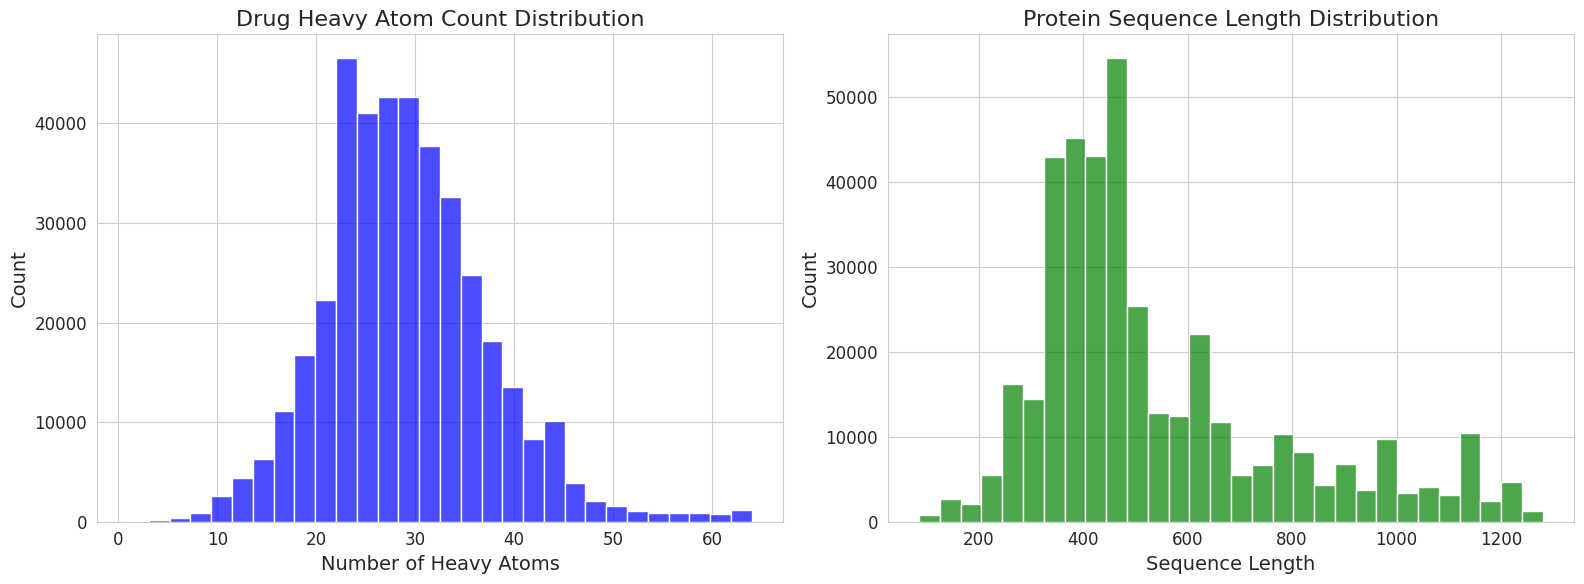

'data/images/dataset_statistics.png'

In [8]:
plot_dataset_statistics(df)

In [9]:
from mb_vae_dti.loading.visualization import plot_interaction_stats

print(plot_interaction_stats(df))

Matrix Coverage: 0.0013 (396,469 observations out of 306,972,214 possible)

Drug Statistics:
  Unique Drugs: 149,962
  Average Observations per Drug: 2.64
  Median Observations per Drug: 1
  Average Positive Interaction Rate: 35.87%
  Median Positive Interaction Rate: 0.00%
  Drugs with Single Observation: 85,352 (56.92%)
  Drugs with Zero Positive Interactions: 81,958 (54.65%)
  Drugs with 100% Positive Interactions: 42,699 (28.47%)

Target Statistics:
  Unique Targets: 2,047
  Average Observations per Target: 193.68
  Median Observations per Target: 23
  Average Positive Interaction Rate: 20.45%
  Median Positive Interaction Rate: 8.51%
  Targets with Single Observation: 267 (13.04%)
  Targets with Zero Positive Interactions: 755 (36.88%)
  Targets with 100% Positive Interactions: 92 (4.49%)



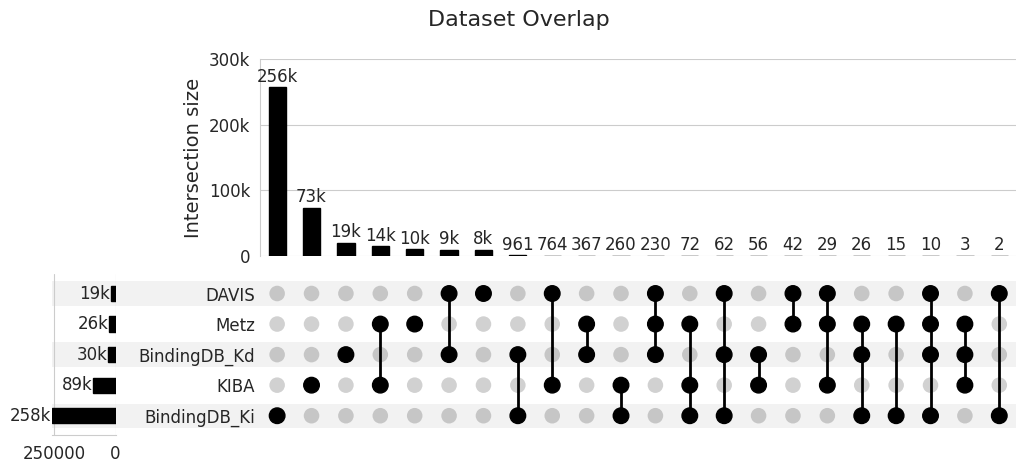

'data/images/dataset_overlap.png'

In [10]:
# This UpSet plot shows
# - the number of unique interactions per dataset
# - the overlap between datasets
plot_dataset_overlap(df)

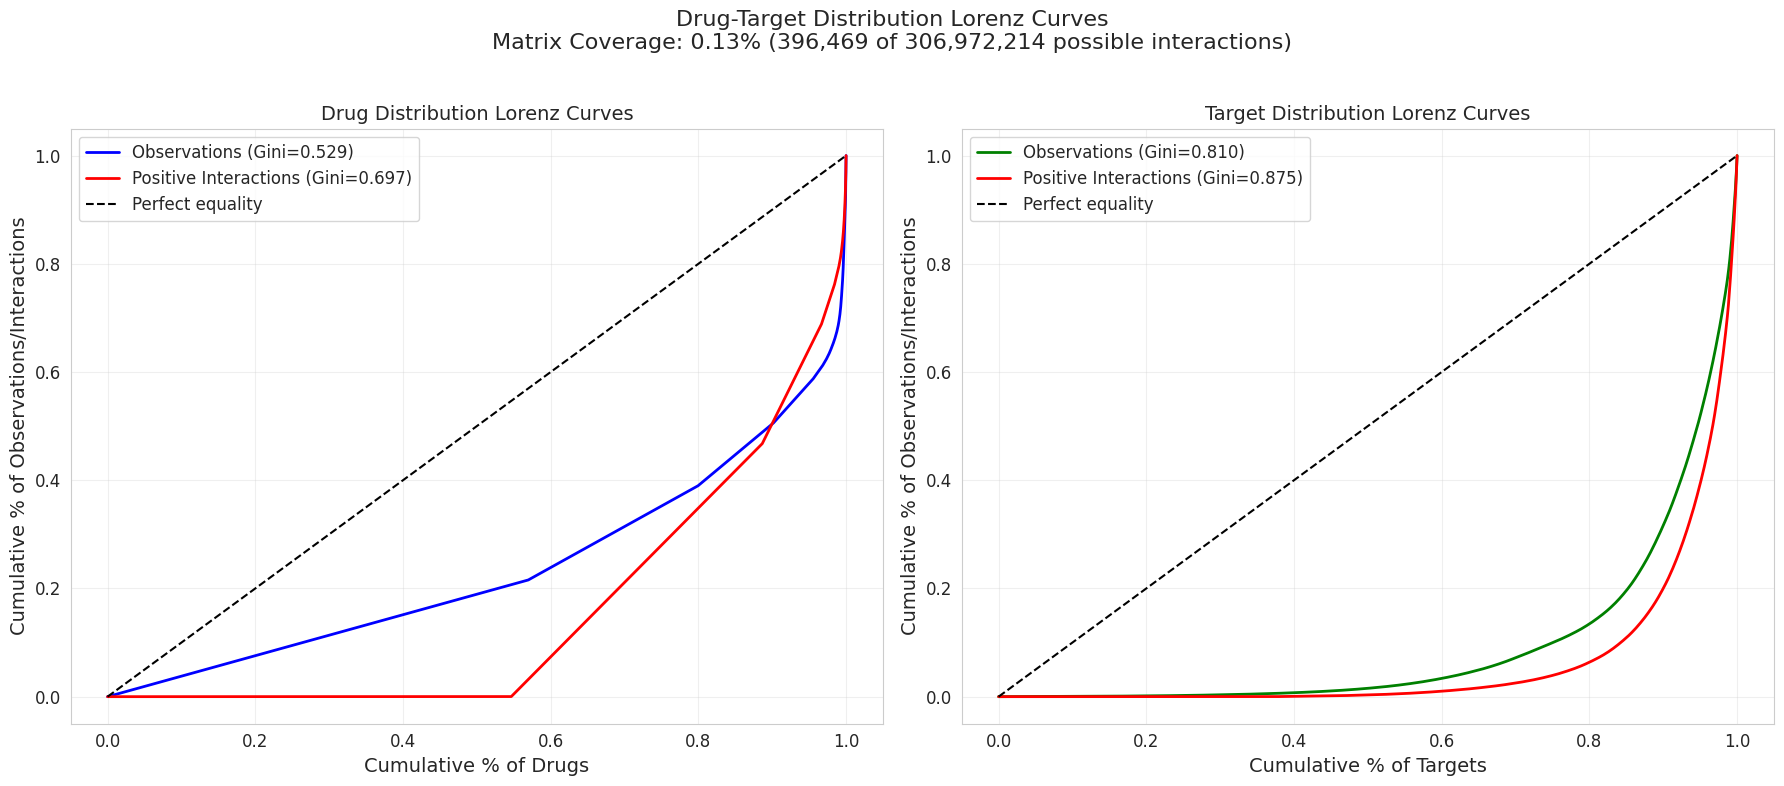

'data/images/lorenz_curves.png'

In [11]:
plot_lorenz_curves(df)

In [12]:
# print unique drugs and targets, interactions, number of possible interactions and ratio
print(f"Unique drugs: {len(df['Drug_SMILES'].unique())}")
print(f"Unique targets: {len(df['Target_AA'].unique())}")
print(f"Interactions: {len(df)}")
print(f"Number of possible interactions: {len(df['Drug_SMILES'].unique()) * len(df['Target_AA'].unique())}")
print(f"Ratio: {(len(df) / (len(df['Drug_SMILES'].unique()) * len(df['Target_AA'].unique()))) * 100}%")
df

Unique drugs: 149962
Unique targets: 2047
Interactions: 396469
Number of possible interactions: 306972214
Ratio: 0.12915468629352883%


,Drug_ID,Drug_InChIKey,Drug_SMILES,Target_ID,Target_UniProt_ID,Target_Gene_name,Target_RefSeq_ID,Target_AA,Target_DNA,Y,Y_pKd,Y_pKi,Y_KIBA,in_DAVIS,in_BindingDB_Kd,in_BindingDB_Ki,in_Metz,in_KIBA
0,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000001,Q2M2I8,AAK1,NM_014911,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,ATGAAGAAGTTTTTCGACTCCCGGCGAGAGCAGGGCGGCTCTGGCC...,False,4.999996,NaN,NaN,True,True,False,False,False
1,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000002,P00519,ABL1,NM_005157,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,AACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACA...,True,8.920819,NaN,NaN,True,False,False,False,False
3,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000003,Q04771,ACVR1,NM_001105,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,ATGGTAGATGGAGTGATGATTCTTCCTGTGCTTATCATGATTGCTC...,False,4.999996,NaN,NaN,True,True,False,False,False
4,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000004,P36896,ACVR1B,NM_004302,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,ATGGCGGAGTCGGCCGGAGCCTCCTCCTTCTTCCCCCTTGTTGTCC...,False,4.999996,NaN,NaN,True,True,False,False,False
5,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000005,P27037,ACVR2A,NM_001278579,MGAAAKLAFAVFLISCSSGAILGRSETQECLFFNANWEKDRTNQTG...,ATGGGAGCTGCTGCAAAGTTGGCGTTTGCCGTCTTTCTTATCTCCT...,False,4.999996,NaN,NaN,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481971,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T001711,P41279,MAP3K8,NM_001244134,MEYMSTGSDNKEEIDLLIKHLNVSDVIDIMENLYASEEPAVYEPSL...,ATGGAGTACATGAGCACTGGAAGTGACAATAAAGAAGAGATTGATT...,True,NaN,NaN,13.70206,False,False,False,False,True
481973,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000031,Q13554,CAMK2B,NM_001220,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,ATGGCCACCACGGTGACCTGCACCCGCTTCACCGACGAGTACCAGC...,False,NaN,NaN,10.49794,False,False,False,False,True
481975,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000032,Q13557,CAMK2D,NM_001221,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,ATGGCTTCGACCACAACCTGCACCAGGTTCACGGACGAGTATCAGC...,False,NaN,NaN,10.49794,False,False,False,False,True
481976,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000280,Q16539,MAPK14,NM_001315,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,ATGTCTCAGGAGAGGCCCACGTTCTACCGGCAGGAGCTGAACAAGA...,False,NaN,NaN,10.49794,False,False,False,False,True


In [13]:
df.to_csv("data/processed/dti.csv", index=False)

In [ ]:
# Columns
# Drug columns: Drug_ID, Drug_InChIKey, Drug_SMILES
# Target columns: Target_ID, Target_UniProt_ID, Target_Gene_name, Target_RefSeq_ID, Target_AA, Target_DNA
# Interaction columns: Y, Y_pKd, Y_pKi, Y_KIBA
# Provenance columns: in_DAVIS, in_BindingDB_Kd, in_BindingDB_Ki, in_Metz, in_KIBA

---

## Drug Generation datasets

We fetch a large set of SMILES strings from the following datasets: MOSES, ZINC, ChEMBL_V29.
This dataset is used to pretrain the drug generation model (unsupervised).
The drugs for which we have DTI data are removed from the drug generation datasets, 
to avoid information leakage.

In [2]:
import os
import pandas as pd

os.chdir("/home/robsyc/Desktop/thesis/MB-VAE-DTI")
df = pd.read_csv("data/processed/data.csv")
df

,Drug_ID,Drug_InChIKey,Drug_SMILES,Target_ID,Target_UniProt_ID,Target_Gene_name,Target_RefSeq_ID,Target_AA,Target_DNA,Y,Y_pKd,Y_pKi,Y_KIBA,in_DAVIS,in_BindingDB_Kd,in_BindingDB_Ki,in_Metz,in_KIBA
0,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000001,Q2M2I8,AAK1,NM_014911,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,ATGAAGAAGTTTTTCGACTCCCGGCGAGAGCAGGGCGGCTCTGGCC...,False,4.999996,NaN,NaN,True,True,False,False,False
1,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000002,P00519,ABL1,NM_005157,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,AACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACA...,True,8.920819,NaN,NaN,True,False,False,False,False
2,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000003,Q04771,ACVR1,NM_001105,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,ATGGTAGATGGAGTGATGATTCTTCCTGTGCTTATCATGATTGCTC...,False,4.999996,NaN,NaN,True,True,False,False,False
3,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000004,P36896,ACVR1B,NM_004302,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,ATGGCGGAGTCGGCCGGAGCCTCCTCCTTCTTCCCCCTTGTTGTCC...,False,4.999996,NaN,NaN,True,True,False,False,False
4,D000001,KTUFNOKKBVMGRW-UHFFFAOYSA-N,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,T000005,P27037,ACVR2A,NM_001278579,MGAAAKLAFAVFLISCSSGAILGRSETQECLFFNANWEKDRTNQTG...,ATGGGAGCTGCTGCAAAGTTGGCGTTTGCCGTCTTTCTTATCTCCT...,False,4.999996,NaN,NaN,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396464,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T001711,P41279,MAP3K8,NM_001244134,MEYMSTGSDNKEEIDLLIKHLNVSDVIDIMENLYASEEPAVYEPSL...,ATGGAGTACATGAGCACTGGAAGTGACAATAAAGAAGAGATTGATT...,True,NaN,NaN,13.70206,False,False,False,False,True
396465,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000031,Q13554,CAMK2B,NM_001220,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,ATGGCCACCACGGTGACCTGCACCCGCTTCACCGACGAGTACCAGC...,False,NaN,NaN,10.49794,False,False,False,False,True
396466,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000032,Q13557,CAMK2D,NM_001221,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,ATGGCTTCGACCACAACCTGCACCAGGTTCACGGACGAGTATCAGC...,False,NaN,NaN,10.49794,False,False,False,False,True
396467,D162026,NGCNZPVYWSEEJK-UHFFFAOYSA-N,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,T000280,Q16539,MAPK14,NM_001315,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,ATGTCTCAGGAGAGGCCCACGTTCTACCGGCAGGAGCTGAACAAGA...,False,NaN,NaN,10.49794,False,False,False,False,True


In [ ]:
from mb_vae_dti.loading import load_drug_generation_datasets

df_drug_generation = load_drug_generation_datasets()
df_drug_generation = df_drug_generation[~df_drug_generation['Drug_SMILES'].isin(df['Drug_SMILES'])]
print(f"Number of unique drugs in drug generation dataset: {len(df_drug_generation['Drug_SMILES'].unique())}")
df_drug_generation.to_csv("data/processed/data_drug_generation.csv", index=False)

In [5]:
df_drug_generation = df_drug_generation[~df_drug_generation['smiles'].isin(df['Drug_SMILES'])]
print(f"Number of unique drugs in drug generation dataset: {len(df_drug_generation['smiles'].unique())}")
df_drug_generation.to_csv("data/processed/data_drug_generation.csv", index=False)
df_drug_generation # 4,130,685 -> 4,007,090

Number of unique drugs in drug generation dataset: 4007090


,smiles
0,Cc1cccc(N2CC(c3nc4ccccc4n3C)CC2=O)c1C
1,CCn1c(C2CC(=O)N(c3cccc(C)c3C)C2)nc2ccccc21
2,Cc1cc(C)c(N2CC(c3nc4ccccc4[nH]3)CC2=O)c(C)c1
3,Cc1cc(C)c(N2CC(c3nc4ccccc4n3C)CC2=O)c(C)c1
4,Cn1c(C2CC(=O)N(Cc3ccccc3)C2)nc2ccccc21
...,...
4271135,Fc1cccc(CNc2nc(Oc3c(F)c(F)c(F)c(F)c3F)nc(N3CCO...
4271136,OC12CC3CC(C1)CC(NCc1cnc(Br)s1)(C3)C2
4271137,CCCCCCCCCCC/C(=N\O)c1cc(-c2ccc(OC)c(F)c2)ccc1O
4271138,Clc1cccc(N2CCN(CCCCOc3ccc4ccccc4c3)CC2)c1
